Decision Tree Accuracy: 1.0000
KNN Accuracy: 1.0000

Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Detailed Comparison:
Species: setosa
  Decision Tree - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
  KNN - Preci

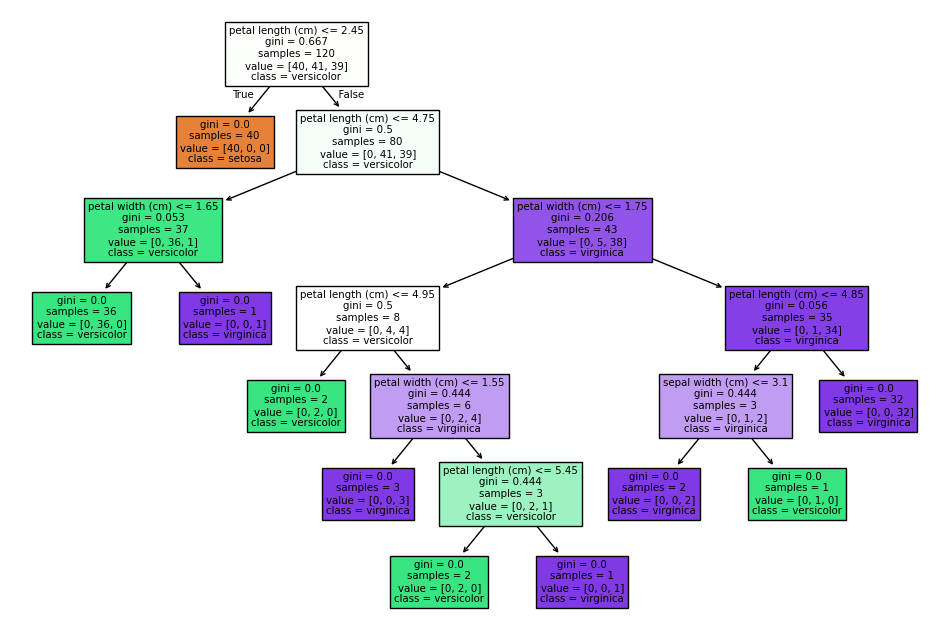

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

dt_acc = accuracy_score(y_test, dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}\n")

print("Decision Tree Classification Report:")
dt_report = classification_report(y_test, dt_pred, target_names=iris.target_names, output_dict=True)
print(classification_report(y_test, dt_pred, target_names=iris.target_names))

print("KNN Classification Report:")
knn_report = classification_report(y_test, knn_pred, target_names=iris.target_names, output_dict=True)
print(classification_report(y_test, knn_pred, target_names=iris.target_names))

print("\nDetailed Comparison:")
for species in iris.target_names:
    print(f"Species: {species}")
    print(f"  Decision Tree - Precision: {dt_report[species]['precision']:.4f}, Recall: {dt_report[species]['recall']:.4f}, F1-score: {dt_report[species]['f1-score']:.4f}")
    print(f"  KNN - Precision: {knn_report[species]['precision']:.4f}, Recall: {knn_report[species]['recall']:.4f}, F1-score: {knn_report[species]['f1-score']:.4f}\n")

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
data["species"] = data["species"].map(species_mapping)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices, train_indices = indices[:test_size], indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)
class DecisionTree:
    def __init__(self):
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _build_tree(self, X, y):
        if len(set(y)) == 1:
            return y[0]
        if X.shape[1] == 0:
            return Counter(y).most_common(1)[0][0]
        
        best_feature = np.random.randint(0, X.shape[1])
        threshold = np.median(X[:, best_feature])
        
        left_idx = X[:, best_feature] <= threshold
        right_idx = X[:, best_feature] > threshold
        
        if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:  # Avoid empty split
            return Counter(y).most_common(1)[0][0]
        
        left_tree = self._build_tree(X[left_idx], y[left_idx])
        right_tree = self._build_tree(X[right_idx], y[right_idx])
        
        return {"feature": best_feature, "threshold": threshold, "left": left_tree, "right": right_tree}
    
    def predict(self, X):
        return np.array([self._predict_single(x, self.tree) for x in X])
    
    def _predict_single(self, x, tree):
        if isinstance(tree, dict):
            if x[tree["feature"]] <= tree["threshold"]:
                return self._predict_single(x, tree["left"])
            else:
                return self._predict_single(x, tree["right"])
        else:
            return tree
class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

dt_model = DecisionTree()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

knn_model = KNN(k=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

dt_acc = accuracy(y_test, dt_pred)
knn_acc = accuracy(y_test, knn_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}\n")
def classification_report_manual(y_true, y_pred, target_names):
    report = {}
    for label, name in target_names.items():
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
        
        report[name] = {"precision": precision, "recall": recall, "f1-score": f1}
    return report

target_names = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

print("Decision Tree Classification Report:")
dt_report = classification_report_manual(y_test, dt_pred, target_names)
print(dt_report)

print("KNN Classification Report:")
knn_report = classification_report_manual(y_test, knn_pred, target_names)
print(knn_report)
def print_tree(tree, depth=0):
    if isinstance(tree, dict):
        print("  " * depth + f"Feature {tree['feature']} <= {tree['threshold']}")
        print_tree(tree['left'], depth + 1)
        print_tree(tree['right'], depth + 1)
    else:
        print("  " * depth + f"Class {tree}")

print("\nDecision Tree Structure:")
print_tree(dt_model.tree)


Decision Tree Accuracy: 0.9000
KNN Accuracy: 1.0000

Decision Tree Classification Report:
{'Iris-setosa': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526316}, 'Iris-versicolor': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571}, 'Iris-virginica': {'precision': 1.0, 'recall': 0.8181818181818182, 'f1-score': 0.9}}
KNN Classification Report:
{'Iris-setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}, 'Iris-versicolor': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}, 'Iris-virginica': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}

Decision Tree Structure:
Feature 2 <= 4.25
  Feature 2 <= 1.5
    Class 0
    Feature 0 <= 5.5
      Feature 2 <= 2.45
        Class 0
        Class 1
      Class 1
  Feature 2 <= 5.1
    Feature 0 <= 6.15
      Feature 3 <= 1.7
        Feature 0 <= 6.0
          Feature 3 <= 1.5
            Feature 2 <= 4.5
              Class 1
              Class 2
            Feature 2 <= 4.5
              Class 1
             